In [1]:
from clusters import algs

import numpy as np
import matplotlib.pyplot as plt

csv = 'ligand_information.csv'
ligands = algs.read_ligand_csv(csv)

#### Question 1:

I used the Tanimoto Coefficient to calculate the similarity between molecules.  The Tanimoto coefficient is equal to the intersection between the two molecules' on bits, divided by the union of the two molecules' on bits.

     Tanimoto Coeff. = J(A, B) = | A ∩ B | / | A ∪ B |

#### Question 2:
- Dimensionality reduction algorithm to visualize molecule dataset

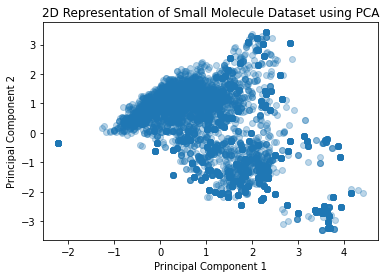

In [2]:
from sklearn.decomposition import PCA

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

pc1 = x[:, 0]
pc2 = x[:, 1]

plt.scatter(pc1, pc2, alpha=0.3)
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Question 3:

Partitional Clustering --> Visualizing Clusters on PCA plot

In [3]:
## Code I ran to populate and save the distance matrix:
#hc2 = algs.HierarchicalClustering()
#distanceMatrix2 = hc2.makeDistanceMatrix(ligands)
#np.save('distanceMatrix2.npy', distanceMatrix2)

distanceMatrix2 = np.load('distanceMatrix2.npy')

In [4]:
pc = algs.PartitionClustering()

In [5]:
pcclusters = pc.cluster(ligands, distanceMatrix2, numClusters = 5, verbose = True)

Init Centroids
Iteration number 1. Sum of changed centroid bits = 181
Iteration number 2. Sum of changed centroid bits = 57
Iteration number 3. Sum of changed centroid bits = 66
Iteration number 4. Sum of changed centroid bits = 67
Iteration number 5. Sum of changed centroid bits = 68
Iteration number 6. Sum of changed centroid bits = 70
Iteration number 7. Sum of changed centroid bits = 66
Iteration number 8. Sum of changed centroid bits = 63
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 9. Sum of changed centroid bits = 66
Iteration number 10. Sum of changed centroid bits = 57
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 11. Sum of changed centroid bits = 155
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and remo

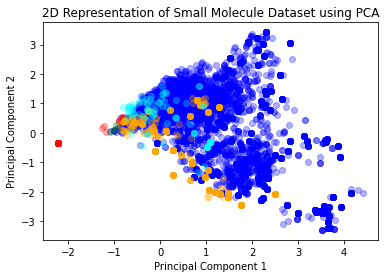

In [6]:
i = 0
colors = ['blue', 'red', 'green', 'orange', 'cyan']

x = [ligand.bitstring for ligand in ligands]
x = np.array(x)

pca = PCA(n_components=2)
pca.fit(x)
#print(pca.singular_values_)
x = pca.transform(x)

for cluster in pcclusters:
    pc1 = []
    pc2 = []
    for ligand in cluster.ligands:
        pc1.append(x[ligand.ligandIndex, 0])
        pc2.append(x[ligand.ligandIndex, 1])
    plt.scatter(pc1, pc2, color=colors[i], alpha=0.3)
    i+=1
    
plt.title('2D Representation of Small Molecule Dataset using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [7]:
for cluster in pcclusters:
    print(len(cluster.ligands))

4993
2996
4
437
94


In [8]:
sc = algs.silhouetteCoeff(pcclusters, distanceMatrix2)

running sc function
cluster number 0
cluster 0 ligand 0
cluster 0 ligand 1
cluster 0 ligand 2
cluster 0 ligand 3
cluster 0 ligand 4
cluster 0 ligand 5
cluster 0 ligand 6
cluster 0 ligand 7
cluster 0 ligand 8
cluster 0 ligand 9
cluster 0 ligand 10
cluster 0 ligand 11
cluster 0 ligand 12
cluster 0 ligand 13
cluster 0 ligand 14
cluster 0 ligand 15
cluster 0 ligand 16
cluster 0 ligand 17
cluster 0 ligand 18
cluster 0 ligand 19
cluster 0 ligand 20
cluster 0 ligand 21
cluster 0 ligand 22
cluster 0 ligand 23
cluster 0 ligand 24
cluster 0 ligand 25
cluster 0 ligand 26
cluster 0 ligand 27
cluster 0 ligand 28
cluster 0 ligand 29
cluster 0 ligand 30
cluster 0 ligand 31
cluster 0 ligand 32
cluster 0 ligand 33
cluster 0 ligand 34
cluster 0 ligand 35
cluster 0 ligand 36
cluster 0 ligand 37
cluster 0 ligand 38
cluster 0 ligand 39
cluster 0 ligand 40
cluster 0 ligand 41
cluster 0 ligand 42
cluster 0 ligand 43
cluster 0 ligand 44
cluster 0 ligand 45
cluster 0 ligand 46
cluster 0 ligand 47
cluster 0 lig

cluster 0 ligand 417
cluster 0 ligand 418
cluster 0 ligand 419
cluster 0 ligand 420
cluster 0 ligand 421
cluster 0 ligand 422
cluster 0 ligand 423
cluster 0 ligand 424
cluster 0 ligand 425
cluster 0 ligand 426
cluster 0 ligand 427
cluster 0 ligand 428
cluster 0 ligand 429
cluster 0 ligand 430
cluster 0 ligand 431
cluster 0 ligand 432
cluster 0 ligand 433
cluster 0 ligand 434
cluster 0 ligand 435
cluster 0 ligand 436
cluster 0 ligand 437
cluster 0 ligand 438
cluster 0 ligand 439
cluster 0 ligand 440
cluster 0 ligand 441
cluster 0 ligand 442
cluster 0 ligand 443
cluster 0 ligand 444
cluster 0 ligand 445
cluster 0 ligand 446
cluster 0 ligand 447
cluster 0 ligand 448
cluster 0 ligand 449
cluster 0 ligand 450
cluster 0 ligand 451
cluster 0 ligand 452
cluster 0 ligand 453
cluster 0 ligand 454
cluster 0 ligand 455
cluster 0 ligand 456
cluster 0 ligand 457
cluster 0 ligand 458
cluster 0 ligand 459
cluster 0 ligand 460
cluster 0 ligand 461
cluster 0 ligand 462
cluster 0 ligand 463
cluster 0 lig

cluster 0 ligand 817
cluster 0 ligand 818
cluster 0 ligand 819
cluster 0 ligand 820
cluster 0 ligand 821
cluster 0 ligand 822
cluster 0 ligand 823
cluster 0 ligand 824
cluster 0 ligand 825
cluster 0 ligand 826
cluster 0 ligand 827
cluster 0 ligand 828
cluster 0 ligand 829
cluster 0 ligand 830
cluster 0 ligand 831
cluster 0 ligand 832
cluster 0 ligand 833
cluster 0 ligand 834
cluster 0 ligand 835
cluster 0 ligand 836
cluster 0 ligand 837
cluster 0 ligand 838
cluster 0 ligand 839
cluster 0 ligand 840
cluster 0 ligand 841
cluster 0 ligand 842
cluster 0 ligand 843
cluster 0 ligand 844
cluster 0 ligand 845
cluster 0 ligand 846
cluster 0 ligand 847
cluster 0 ligand 848
cluster 0 ligand 849
cluster 0 ligand 850
cluster 0 ligand 851
cluster 0 ligand 852
cluster 0 ligand 853
cluster 0 ligand 854
cluster 0 ligand 855
cluster 0 ligand 856
cluster 0 ligand 857
cluster 0 ligand 858
cluster 0 ligand 859
cluster 0 ligand 860
cluster 0 ligand 861
cluster 0 ligand 862
cluster 0 ligand 863
cluster 0 lig

cluster 0 ligand 1218
cluster 0 ligand 1219
cluster 0 ligand 1220
cluster 0 ligand 1221
cluster 0 ligand 1222
cluster 0 ligand 1223
cluster 0 ligand 1224
cluster 0 ligand 1225
cluster 0 ligand 1226
cluster 0 ligand 1227
cluster 0 ligand 1228
cluster 0 ligand 1229
cluster 0 ligand 1230
cluster 0 ligand 1231
cluster 0 ligand 1232
cluster 0 ligand 1233
cluster 0 ligand 1234
cluster 0 ligand 1235
cluster 0 ligand 1236
cluster 0 ligand 1237
cluster 0 ligand 1238
cluster 0 ligand 1239
cluster 0 ligand 1240
cluster 0 ligand 1241
cluster 0 ligand 1242
cluster 0 ligand 1243
cluster 0 ligand 1244
cluster 0 ligand 1245
cluster 0 ligand 1246
cluster 0 ligand 1247
cluster 0 ligand 1248
cluster 0 ligand 1249
cluster 0 ligand 1250
cluster 0 ligand 1251
cluster 0 ligand 1252
cluster 0 ligand 1253
cluster 0 ligand 1254
cluster 0 ligand 1255
cluster 0 ligand 1256
cluster 0 ligand 1257
cluster 0 ligand 1258
cluster 0 ligand 1259
cluster 0 ligand 1260
cluster 0 ligand 1261
cluster 0 ligand 1262
cluster 0 

cluster 0 ligand 1613
cluster 0 ligand 1614
cluster 0 ligand 1615
cluster 0 ligand 1616
cluster 0 ligand 1617
cluster 0 ligand 1618
cluster 0 ligand 1619
cluster 0 ligand 1620
cluster 0 ligand 1621
cluster 0 ligand 1622
cluster 0 ligand 1623
cluster 0 ligand 1624
cluster 0 ligand 1625
cluster 0 ligand 1626
cluster 0 ligand 1627
cluster 0 ligand 1628
cluster 0 ligand 1629
cluster 0 ligand 1630
cluster 0 ligand 1631
cluster 0 ligand 1632
cluster 0 ligand 1633
cluster 0 ligand 1634
cluster 0 ligand 1635
cluster 0 ligand 1636
cluster 0 ligand 1637
cluster 0 ligand 1638
cluster 0 ligand 1639
cluster 0 ligand 1640
cluster 0 ligand 1641
cluster 0 ligand 1642
cluster 0 ligand 1643
cluster 0 ligand 1644
cluster 0 ligand 1645
cluster 0 ligand 1646
cluster 0 ligand 1647
cluster 0 ligand 1648
cluster 0 ligand 1649
cluster 0 ligand 1650
cluster 0 ligand 1651
cluster 0 ligand 1652
cluster 0 ligand 1653
cluster 0 ligand 1654
cluster 0 ligand 1655
cluster 0 ligand 1656
cluster 0 ligand 1657
cluster 0 

cluster 0 ligand 1991
cluster 0 ligand 1992
cluster 0 ligand 1993
cluster 0 ligand 1994
cluster 0 ligand 1995
cluster 0 ligand 1996
cluster 0 ligand 1997
cluster 0 ligand 1998
cluster 0 ligand 1999
cluster 0 ligand 2000
cluster 0 ligand 2001
cluster 0 ligand 2002
cluster 0 ligand 2003
cluster 0 ligand 2004
cluster 0 ligand 2005
cluster 0 ligand 2006
cluster 0 ligand 2007
cluster 0 ligand 2008
cluster 0 ligand 2009
cluster 0 ligand 2010
cluster 0 ligand 2011
cluster 0 ligand 2012
cluster 0 ligand 2013
cluster 0 ligand 2014
cluster 0 ligand 2015
cluster 0 ligand 2016
cluster 0 ligand 2017
cluster 0 ligand 2018
cluster 0 ligand 2019
cluster 0 ligand 2020
cluster 0 ligand 2021
cluster 0 ligand 2022
cluster 0 ligand 2023
cluster 0 ligand 2024
cluster 0 ligand 2025
cluster 0 ligand 2026
cluster 0 ligand 2027
cluster 0 ligand 2028
cluster 0 ligand 2029
cluster 0 ligand 2030
cluster 0 ligand 2031
cluster 0 ligand 2032
cluster 0 ligand 2033
cluster 0 ligand 2034
cluster 0 ligand 2035
cluster 0 

cluster 0 ligand 2386
cluster 0 ligand 2387
cluster 0 ligand 2388
cluster 0 ligand 2389
cluster 0 ligand 2390
cluster 0 ligand 2391
cluster 0 ligand 2392
cluster 0 ligand 2393
cluster 0 ligand 2394
cluster 0 ligand 2395
cluster 0 ligand 2396
cluster 0 ligand 2397
cluster 0 ligand 2398
cluster 0 ligand 2399
cluster 0 ligand 2400
cluster 0 ligand 2401
cluster 0 ligand 2402
cluster 0 ligand 2403
cluster 0 ligand 2404
cluster 0 ligand 2405
cluster 0 ligand 2406
cluster 0 ligand 2407
cluster 0 ligand 2408
cluster 0 ligand 2409
cluster 0 ligand 2410
cluster 0 ligand 2411
cluster 0 ligand 2412
cluster 0 ligand 2413
cluster 0 ligand 2414
cluster 0 ligand 2415
cluster 0 ligand 2416
cluster 0 ligand 2417
cluster 0 ligand 2418
cluster 0 ligand 2419
cluster 0 ligand 2420
cluster 0 ligand 2421
cluster 0 ligand 2422
cluster 0 ligand 2423
cluster 0 ligand 2424
cluster 0 ligand 2425
cluster 0 ligand 2426
cluster 0 ligand 2427
cluster 0 ligand 2428
cluster 0 ligand 2429
cluster 0 ligand 2430
cluster 0 

cluster 0 ligand 2776
cluster 0 ligand 2777
cluster 0 ligand 2778
cluster 0 ligand 2779
cluster 0 ligand 2780
cluster 0 ligand 2781
cluster 0 ligand 2782
cluster 0 ligand 2783
cluster 0 ligand 2784
cluster 0 ligand 2785
cluster 0 ligand 2786
cluster 0 ligand 2787
cluster 0 ligand 2788
cluster 0 ligand 2789
cluster 0 ligand 2790
cluster 0 ligand 2791
cluster 0 ligand 2792
cluster 0 ligand 2793
cluster 0 ligand 2794
cluster 0 ligand 2795
cluster 0 ligand 2796
cluster 0 ligand 2797
cluster 0 ligand 2798
cluster 0 ligand 2799
cluster 0 ligand 2800
cluster 0 ligand 2801
cluster 0 ligand 2802
cluster 0 ligand 2803
cluster 0 ligand 2804
cluster 0 ligand 2805
cluster 0 ligand 2806
cluster 0 ligand 2807
cluster 0 ligand 2808
cluster 0 ligand 2809
cluster 0 ligand 2810
cluster 0 ligand 2811
cluster 0 ligand 2812
cluster 0 ligand 2813
cluster 0 ligand 2814
cluster 0 ligand 2815
cluster 0 ligand 2816
cluster 0 ligand 2817
cluster 0 ligand 2818
cluster 0 ligand 2819
cluster 0 ligand 2820
cluster 0 

cluster 0 ligand 3165
cluster 0 ligand 3166
cluster 0 ligand 3167
cluster 0 ligand 3168
cluster 0 ligand 3169
cluster 0 ligand 3170
cluster 0 ligand 3171
cluster 0 ligand 3172
cluster 0 ligand 3173
cluster 0 ligand 3174
cluster 0 ligand 3175
cluster 0 ligand 3176
cluster 0 ligand 3177
cluster 0 ligand 3178
cluster 0 ligand 3179
cluster 0 ligand 3180
cluster 0 ligand 3181
cluster 0 ligand 3182
cluster 0 ligand 3183
cluster 0 ligand 3184
cluster 0 ligand 3185
cluster 0 ligand 3186
cluster 0 ligand 3187
cluster 0 ligand 3188
cluster 0 ligand 3189
cluster 0 ligand 3190
cluster 0 ligand 3191
cluster 0 ligand 3192
cluster 0 ligand 3193
cluster 0 ligand 3194
cluster 0 ligand 3195
cluster 0 ligand 3196
cluster 0 ligand 3197
cluster 0 ligand 3198
cluster 0 ligand 3199
cluster 0 ligand 3200
cluster 0 ligand 3201
cluster 0 ligand 3202
cluster 0 ligand 3203
cluster 0 ligand 3204
cluster 0 ligand 3205
cluster 0 ligand 3206
cluster 0 ligand 3207
cluster 0 ligand 3208
cluster 0 ligand 3209
cluster 0 

cluster 0 ligand 3547
cluster 0 ligand 3548
cluster 0 ligand 3549
cluster 0 ligand 3550
cluster 0 ligand 3551
cluster 0 ligand 3552
cluster 0 ligand 3553
cluster 0 ligand 3554
cluster 0 ligand 3555
cluster 0 ligand 3556
cluster 0 ligand 3557
cluster 0 ligand 3558
cluster 0 ligand 3559
cluster 0 ligand 3560
cluster 0 ligand 3561
cluster 0 ligand 3562
cluster 0 ligand 3563
cluster 0 ligand 3564
cluster 0 ligand 3565
cluster 0 ligand 3566
cluster 0 ligand 3567
cluster 0 ligand 3568
cluster 0 ligand 3569
cluster 0 ligand 3570
cluster 0 ligand 3571
cluster 0 ligand 3572
cluster 0 ligand 3573
cluster 0 ligand 3574
cluster 0 ligand 3575
cluster 0 ligand 3576
cluster 0 ligand 3577
cluster 0 ligand 3578
cluster 0 ligand 3579
cluster 0 ligand 3580
cluster 0 ligand 3581
cluster 0 ligand 3582
cluster 0 ligand 3583
cluster 0 ligand 3584
cluster 0 ligand 3585
cluster 0 ligand 3586
cluster 0 ligand 3587
cluster 0 ligand 3588
cluster 0 ligand 3589
cluster 0 ligand 3590
cluster 0 ligand 3591
cluster 0 

cluster 0 ligand 3927
cluster 0 ligand 3928
cluster 0 ligand 3929
cluster 0 ligand 3930
cluster 0 ligand 3931
cluster 0 ligand 3932
cluster 0 ligand 3933
cluster 0 ligand 3934
cluster 0 ligand 3935
cluster 0 ligand 3936
cluster 0 ligand 3937
cluster 0 ligand 3938
cluster 0 ligand 3939
cluster 0 ligand 3940
cluster 0 ligand 3941
cluster 0 ligand 3942
cluster 0 ligand 3943
cluster 0 ligand 3944
cluster 0 ligand 3945
cluster 0 ligand 3946
cluster 0 ligand 3947
cluster 0 ligand 3948
cluster 0 ligand 3949
cluster 0 ligand 3950
cluster 0 ligand 3951
cluster 0 ligand 3952
cluster 0 ligand 3953
cluster 0 ligand 3954
cluster 0 ligand 3955
cluster 0 ligand 3956
cluster 0 ligand 3957
cluster 0 ligand 3958
cluster 0 ligand 3959
cluster 0 ligand 3960
cluster 0 ligand 3961
cluster 0 ligand 3962
cluster 0 ligand 3963
cluster 0 ligand 3964
cluster 0 ligand 3965
cluster 0 ligand 3966
cluster 0 ligand 3967
cluster 0 ligand 3968
cluster 0 ligand 3969
cluster 0 ligand 3970
cluster 0 ligand 3971
cluster 0 

cluster 0 ligand 4300
cluster 0 ligand 4301
cluster 0 ligand 4302
cluster 0 ligand 4303
cluster 0 ligand 4304
cluster 0 ligand 4305
cluster 0 ligand 4306
cluster 0 ligand 4307
cluster 0 ligand 4308
cluster 0 ligand 4309
cluster 0 ligand 4310
cluster 0 ligand 4311
cluster 0 ligand 4312
cluster 0 ligand 4313
cluster 0 ligand 4314
cluster 0 ligand 4315
cluster 0 ligand 4316
cluster 0 ligand 4317
cluster 0 ligand 4318
cluster 0 ligand 4319
cluster 0 ligand 4320
cluster 0 ligand 4321
cluster 0 ligand 4322
cluster 0 ligand 4323
cluster 0 ligand 4324
cluster 0 ligand 4325
cluster 0 ligand 4326
cluster 0 ligand 4327
cluster 0 ligand 4328
cluster 0 ligand 4329
cluster 0 ligand 4330
cluster 0 ligand 4331
cluster 0 ligand 4332
cluster 0 ligand 4333
cluster 0 ligand 4334
cluster 0 ligand 4335
cluster 0 ligand 4336
cluster 0 ligand 4337
cluster 0 ligand 4338
cluster 0 ligand 4339
cluster 0 ligand 4340
cluster 0 ligand 4341
cluster 0 ligand 4342
cluster 0 ligand 4343
cluster 0 ligand 4344
cluster 0 

cluster 0 ligand 4687
cluster 0 ligand 4688
cluster 0 ligand 4689
cluster 0 ligand 4690
cluster 0 ligand 4691
cluster 0 ligand 4692
cluster 0 ligand 4693
cluster 0 ligand 4694
cluster 0 ligand 4695
cluster 0 ligand 4696
cluster 0 ligand 4697
cluster 0 ligand 4698
cluster 0 ligand 4699
cluster 0 ligand 4700
cluster 0 ligand 4701
cluster 0 ligand 4702
cluster 0 ligand 4703
cluster 0 ligand 4704
cluster 0 ligand 4705
cluster 0 ligand 4706
cluster 0 ligand 4707
cluster 0 ligand 4708
cluster 0 ligand 4709
cluster 0 ligand 4710
cluster 0 ligand 4711
cluster 0 ligand 4712
cluster 0 ligand 4713
cluster 0 ligand 4714
cluster 0 ligand 4715
cluster 0 ligand 4716
cluster 0 ligand 4717
cluster 0 ligand 4718
cluster 0 ligand 4719
cluster 0 ligand 4720
cluster 0 ligand 4721
cluster 0 ligand 4722
cluster 0 ligand 4723
cluster 0 ligand 4724
cluster 0 ligand 4725
cluster 0 ligand 4726
cluster 0 ligand 4727
cluster 0 ligand 4728
cluster 0 ligand 4729
cluster 0 ligand 4730
cluster 0 ligand 4731
cluster 0 

cluster 1 ligand 5069
cluster 1 ligand 5070
cluster 1 ligand 5071
cluster 1 ligand 5072
cluster 1 ligand 5073
cluster 1 ligand 5074
cluster 1 ligand 5075
cluster 1 ligand 5076
cluster 1 ligand 5077
cluster 1 ligand 5078
cluster 1 ligand 5079
cluster 1 ligand 5080
cluster 1 ligand 5081
cluster 1 ligand 5082
cluster 1 ligand 5083
cluster 1 ligand 5084
cluster 1 ligand 5085
cluster 1 ligand 5086
cluster 1 ligand 5087
cluster 1 ligand 5088
cluster 1 ligand 5089
cluster 1 ligand 5090
cluster 1 ligand 5091
cluster 1 ligand 5092
cluster 1 ligand 5093
cluster 1 ligand 5094
cluster 1 ligand 5095
cluster 1 ligand 5096
cluster 1 ligand 5097
cluster 1 ligand 5098
cluster 1 ligand 5099
cluster 1 ligand 5100
cluster 1 ligand 5101
cluster 1 ligand 5102
cluster 1 ligand 5103
cluster 1 ligand 5104
cluster 1 ligand 5105
cluster 1 ligand 5106
cluster 1 ligand 5107
cluster 1 ligand 5108
cluster 1 ligand 5109
cluster 1 ligand 5110
cluster 1 ligand 5111
cluster 1 ligand 5112
cluster 1 ligand 5113
cluster 1 

cluster 1 ligand 5448
cluster 1 ligand 5449
cluster 1 ligand 5450
cluster 1 ligand 5451
cluster 1 ligand 5452
cluster 1 ligand 5453
cluster 1 ligand 5454
cluster 1 ligand 5455
cluster 1 ligand 5456
cluster 1 ligand 5457
cluster 1 ligand 5458
cluster 1 ligand 5459
cluster 1 ligand 5460
cluster 1 ligand 5461
cluster 1 ligand 5462
cluster 1 ligand 5463
cluster 1 ligand 5464
cluster 1 ligand 5465
cluster 1 ligand 5466
cluster 1 ligand 5467
cluster 1 ligand 5468
cluster 1 ligand 5469
cluster 1 ligand 5470
cluster 1 ligand 5471
cluster 1 ligand 5472
cluster 1 ligand 5473
cluster 1 ligand 5474
cluster 1 ligand 5475
cluster 1 ligand 5476
cluster 1 ligand 5477
cluster 1 ligand 5478
cluster 1 ligand 5479
cluster 1 ligand 5480
cluster 1 ligand 5481
cluster 1 ligand 5482
cluster 1 ligand 5483
cluster 1 ligand 5484
cluster 1 ligand 5485
cluster 1 ligand 5486
cluster 1 ligand 5487
cluster 1 ligand 5488
cluster 1 ligand 5489
cluster 1 ligand 5490
cluster 1 ligand 5491
cluster 1 ligand 5492
cluster 1 

cluster 1 ligand 5820
cluster 1 ligand 5821
cluster 1 ligand 5822
cluster 1 ligand 5823
cluster 1 ligand 5824
cluster 1 ligand 5825
cluster 1 ligand 5826
cluster 1 ligand 5827
cluster 1 ligand 5828
cluster 1 ligand 5829
cluster 1 ligand 5830
cluster 1 ligand 5831
cluster 1 ligand 5832
cluster 1 ligand 5833
cluster 1 ligand 5834
cluster 1 ligand 5835
cluster 1 ligand 5836
cluster 1 ligand 5837
cluster 1 ligand 5838
cluster 1 ligand 5839
cluster 1 ligand 5840
cluster 1 ligand 5841
cluster 1 ligand 5842
cluster 1 ligand 5843
cluster 1 ligand 5844
cluster 1 ligand 5845
cluster 1 ligand 5846
cluster 1 ligand 5847
cluster 1 ligand 5848
cluster 1 ligand 5849
cluster 1 ligand 5850
cluster 1 ligand 5851
cluster 1 ligand 5852
cluster 1 ligand 5853
cluster 1 ligand 5854
cluster 1 ligand 5855
cluster 1 ligand 5856
cluster 1 ligand 5857
cluster 1 ligand 5858
cluster 1 ligand 5859
cluster 1 ligand 5860
cluster 1 ligand 5861
cluster 1 ligand 5862
cluster 1 ligand 5863
cluster 1 ligand 5864
cluster 1 

cluster 1 ligand 6198
cluster 1 ligand 6199
cluster 1 ligand 6200
cluster 1 ligand 6201
cluster 1 ligand 6202
cluster 1 ligand 6203
cluster 1 ligand 6204
cluster 1 ligand 6205
cluster 1 ligand 6206
cluster 1 ligand 6207
cluster 1 ligand 6208
cluster 1 ligand 6209
cluster 1 ligand 6210
cluster 1 ligand 6211
cluster 1 ligand 6212
cluster 1 ligand 6213
cluster 1 ligand 6214
cluster 1 ligand 6215
cluster 1 ligand 6216
cluster 1 ligand 6217
cluster 1 ligand 6218
cluster 1 ligand 6219
cluster 1 ligand 6220
cluster 1 ligand 6221
cluster 1 ligand 6222
cluster 1 ligand 6223
cluster 1 ligand 6224
cluster 1 ligand 6225
cluster 1 ligand 6226
cluster 1 ligand 6227
cluster 1 ligand 6228
cluster 1 ligand 6229
cluster 1 ligand 6230
cluster 1 ligand 6231
cluster 1 ligand 6232
cluster 1 ligand 6233
cluster 1 ligand 6234
cluster 1 ligand 6235
cluster 1 ligand 6236
cluster 1 ligand 6237
cluster 1 ligand 6238
cluster 1 ligand 6239
cluster 1 ligand 6240
cluster 1 ligand 6241
cluster 1 ligand 6242
cluster 1 

cluster 1 ligand 6578
cluster 1 ligand 6579
cluster 1 ligand 6580
cluster 1 ligand 6581
cluster 1 ligand 6582
cluster 1 ligand 6583
cluster 1 ligand 6584
cluster 1 ligand 6585
cluster 1 ligand 6586
cluster 1 ligand 6587
cluster 1 ligand 6588
cluster 1 ligand 6589
cluster 1 ligand 6590
cluster 1 ligand 6591
cluster 1 ligand 6592
cluster 1 ligand 6593
cluster 1 ligand 6594
cluster 1 ligand 6595
cluster 1 ligand 6596
cluster 1 ligand 6597
cluster 1 ligand 6598
cluster 1 ligand 6599
cluster 1 ligand 6600
cluster 1 ligand 6601
cluster 1 ligand 6602
cluster 1 ligand 6603
cluster 1 ligand 6604
cluster 1 ligand 6605
cluster 1 ligand 6606
cluster 1 ligand 6607
cluster 1 ligand 6608
cluster 1 ligand 6609
cluster 1 ligand 6610
cluster 1 ligand 6611
cluster 1 ligand 6612
cluster 1 ligand 6613
cluster 1 ligand 6614
cluster 1 ligand 6615
cluster 1 ligand 6616
cluster 1 ligand 6617
cluster 1 ligand 6618
cluster 1 ligand 6619
cluster 1 ligand 6620
cluster 1 ligand 6621
cluster 1 ligand 6622
cluster 1 

cluster 1 ligand 6959
cluster 1 ligand 6960
cluster 1 ligand 6961
cluster 1 ligand 6962
cluster 1 ligand 6963
cluster 1 ligand 6964
cluster 1 ligand 6965
cluster 1 ligand 6966
cluster 1 ligand 6967
cluster 1 ligand 6968
cluster 1 ligand 6969
cluster 1 ligand 6970
cluster 1 ligand 6971
cluster 1 ligand 6972
cluster 1 ligand 6973
cluster 1 ligand 6974
cluster 1 ligand 6975
cluster 1 ligand 6976
cluster 1 ligand 6977
cluster 1 ligand 6978
cluster 1 ligand 6979
cluster 1 ligand 6980
cluster 1 ligand 6981
cluster 1 ligand 6982
cluster 1 ligand 6983
cluster 1 ligand 6984
cluster 1 ligand 6985
cluster 1 ligand 6986
cluster 1 ligand 6987
cluster 1 ligand 6988
cluster 1 ligand 6989
cluster 1 ligand 6990
cluster 1 ligand 6991
cluster 1 ligand 6992
cluster 1 ligand 6993
cluster 1 ligand 6994
cluster 1 ligand 6995
cluster 1 ligand 6996
cluster 1 ligand 6997
cluster 1 ligand 6998
cluster 1 ligand 6999
cluster 1 ligand 7000
cluster 1 ligand 7001
cluster 1 ligand 7002
cluster 1 ligand 7003
cluster 1 

cluster 1 ligand 7342
cluster 1 ligand 7343
cluster 1 ligand 7344
cluster 1 ligand 7345
cluster 1 ligand 7346
cluster 1 ligand 7347
cluster 1 ligand 7348
cluster 1 ligand 7349
cluster 1 ligand 7350
cluster 1 ligand 7351
cluster 1 ligand 7352
cluster 1 ligand 7353
cluster 1 ligand 7354
cluster 1 ligand 7355
cluster 1 ligand 7356
cluster 1 ligand 7357
cluster 1 ligand 7358
cluster 1 ligand 7359
cluster 1 ligand 7360
cluster 1 ligand 7361
cluster 1 ligand 7362
cluster 1 ligand 7363
cluster 1 ligand 7364
cluster 1 ligand 7365
cluster 1 ligand 7366
cluster 1 ligand 7367
cluster 1 ligand 7368
cluster 1 ligand 7369
cluster 1 ligand 7370
cluster 1 ligand 7371
cluster 1 ligand 7372
cluster 1 ligand 7373
cluster 1 ligand 7374
cluster 1 ligand 7375
cluster 1 ligand 7376
cluster 1 ligand 7377
cluster 1 ligand 7378
cluster 1 ligand 7379
cluster 1 ligand 7380
cluster 1 ligand 7381
cluster 1 ligand 7382
cluster 1 ligand 7383
cluster 1 ligand 7384
cluster 1 ligand 7385
cluster 1 ligand 7386
cluster 1 

cluster 1 ligand 7722
cluster 1 ligand 7723
cluster 1 ligand 7724
cluster 1 ligand 7725
cluster 1 ligand 7726
cluster 1 ligand 7727
cluster 1 ligand 7728
cluster 1 ligand 7729
cluster 1 ligand 7730
cluster 1 ligand 7731
cluster 1 ligand 7732
cluster 1 ligand 7733
cluster 1 ligand 7734
cluster 1 ligand 7735
cluster 1 ligand 7736
cluster 1 ligand 7737
cluster 1 ligand 7738
cluster 1 ligand 7739
cluster 1 ligand 7740
cluster 1 ligand 7741
cluster 1 ligand 7742
cluster 1 ligand 7743
cluster 1 ligand 7744
cluster 1 ligand 7745
cluster 1 ligand 7746
cluster 1 ligand 7747
cluster 1 ligand 7748
cluster 1 ligand 7749
cluster 1 ligand 7750
cluster 1 ligand 7751
cluster 1 ligand 7752
cluster 1 ligand 7753
cluster 1 ligand 7754
cluster 1 ligand 7755
cluster 1 ligand 7756
cluster 1 ligand 7757
cluster 1 ligand 7758
cluster 1 ligand 7759
cluster 1 ligand 7760
cluster 1 ligand 7761
cluster 1 ligand 7762
cluster 1 ligand 7763
cluster 1 ligand 7764
cluster 1 ligand 7765
cluster 1 ligand 7766
cluster 1 

cluster 3 ligand 8094
cluster 3 ligand 8095
cluster 3 ligand 8096
cluster 3 ligand 8097
cluster 3 ligand 8098
cluster 3 ligand 8099
cluster 3 ligand 8100
cluster 3 ligand 8101
cluster 3 ligand 8102
cluster 3 ligand 8103
cluster 3 ligand 8104
cluster 3 ligand 8105
cluster 3 ligand 8106
cluster 3 ligand 8107
cluster 3 ligand 8108
cluster 3 ligand 8109
cluster 3 ligand 8110
cluster 3 ligand 8111
cluster 3 ligand 8112
cluster 3 ligand 8113
cluster 3 ligand 8114
cluster 3 ligand 8115
cluster 3 ligand 8116
cluster 3 ligand 8117
cluster 3 ligand 8118
cluster 3 ligand 8119
cluster 3 ligand 8120
cluster 3 ligand 8121
cluster 3 ligand 8122
cluster 3 ligand 8123
cluster 3 ligand 8124
cluster 3 ligand 8125
cluster 3 ligand 8126
cluster 3 ligand 8127
cluster 3 ligand 8128
cluster 3 ligand 8129
cluster 3 ligand 8130
cluster 3 ligand 8131
cluster 3 ligand 8132
cluster 3 ligand 8133
cluster 3 ligand 8134
cluster 3 ligand 8135
cluster 3 ligand 8136
cluster 3 ligand 8137
cluster 3 ligand 8138
cluster 3 

cluster 4 ligand 8468
cluster 4 ligand 8469
cluster 4 ligand 8470
cluster 4 ligand 8471
cluster 4 ligand 8472
cluster 4 ligand 8473
cluster 4 ligand 8474
cluster 4 ligand 8475
cluster 4 ligand 8476
cluster 4 ligand 8477
cluster 4 ligand 8478
cluster 4 ligand 8479
cluster 4 ligand 8480
cluster 4 ligand 8481
cluster 4 ligand 8482
cluster 4 ligand 8483
cluster 4 ligand 8484
cluster 4 ligand 8485
cluster 4 ligand 8486
cluster 4 ligand 8487
cluster 4 ligand 8488
cluster 4 ligand 8489
cluster 4 ligand 8490
cluster 4 ligand 8491
cluster 4 ligand 8492
cluster 4 ligand 8493
cluster 4 ligand 8494
cluster 4 ligand 8495
cluster 4 ligand 8496
cluster 4 ligand 8497
cluster 4 ligand 8498
cluster 4 ligand 8499
cluster 4 ligand 8500
cluster 4 ligand 8501
cluster 4 ligand 8502
cluster 4 ligand 8503
cluster 4 ligand 8504
cluster 4 ligand 8505
cluster 4 ligand 8506
cluster 4 ligand 8507
cluster 4 ligand 8508
cluster 4 ligand 8509
cluster 4 ligand 8510
cluster 4 ligand 8511
cluster 4 ligand 8512
cluster 4 

In [9]:
print(sc) # -1 wrong, 0 neutral, 1 good

-0.8310813805475518


In [10]:
testpc = algs.PartitionClustering()
testpcclusters = testpc.cluster(ligands, distanceMatrix2, numClusters = 5, verbose = True)

Init Centroids
Iteration number 1. Sum of changed centroid bits = 181
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 2. Sum of changed centroid bits = 56
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 3. Sum of changed centroid bits = 54
Iteration number 4. Sum of changed centroid bits = 58
Iteration number 5. Sum of changed centroid bits = 66
Iteration number 6. Sum of changed centroid bits = 69
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 7. Sum of changed centroid bits = 66
Iteration number 8. Sum of changed centroid bits = 95
Iteration number 9. Sum of changed centroid bits = 91
Iteration number 10. Sum of changed centroid bits = 71
did the adding and removing
did the adding and remo

Iteration number 68. Sum of changed centroid bits = 81
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 69. Sum of changed centroid bits = 75
Iteration number 70. Sum of changed centroid bits = 60
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 71. Sum of changed centroid bits = 60
Iteration number 72. Sum of changed centroid bits = 81
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
Iteration number 73. Sum of changed centroid bits = 75
Iteration number 74. Sum of changed centroid bits = 60
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing
did the adding and removing